# VISUALIZATION LAB - Continuation of the EuroLeague Case Study
## Let's compare the competitions!

![](https://eurospects.com/wp-content/uploads/2018/10/eurocupeuroleague.png)

First of all, we must 

- Import the actual.csv Dataset. This dataset will be the CSV of the result obtained in class.
- Import ec23.xlsx. This dataset correspond to the import the dataset corresponding to Eurocup. Don't worry, this time the Excel will be cleaned (almost)


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
elteams=pd.read_csv("datasets/actual.csv")
ecteams=pd.read_excel("datasets/ec2023.xlsx", index_col=False)

Based on the last lab, you should  have the combination of both competitions in the same dataframe. 

Is time for the questions you must answer... Graphically!

1. How many matches have been in each competition?
2. What are the maximum points that a local team has scored per competition? And the road team as well. 
3. Do the same operations with the average points (per competition)
4. Can you tell me the maximum difference that has been in a match, splitted by competition? 
    - Careful: The Plusminus is both positive and negative, being negative that the Road Team has achieved the Victory. To have the absolute, create a new Column named Absolut_Plusminus. Remember: np.where is life!
5. Also grouped by competition, give me the number of victories of the Locals and the Visitors

In [4]:
ecteams.dropna(inplace=True)
ecteams.drop_duplicates(inplace=True)
ecteams['Competition'] = 'Eurocup'
ecteams.drop(columns='Ganador', inplace=True)
ecteams.rename(columns={'Winner':'Ganador'}, inplace=True)
columnas_minusc = {i:i.capitalize() for i in ecteams.columns}
ecteams.rename(columns = columnas_minusc, inplace=True)

In [5]:
comp_ec = ecteams[['Competition', 'Localscore', 'Roadscore', 'Plusminus', 'Ganador']]
comp_el = elteams[['Competition', 'Localscore', 'Roadscore', 'Plusminus', 'Ganador']]
competition = pd.concat([comp_ec, comp_el])
competition = competition.reset_index(drop=True)
competition

,Competition,Localscore,Roadscore,Plusminus,Ganador
0,Eurocup,111,113.0,-2.0,Visitante
1,Eurocup,78,97.0,-19.0,Visitante
2,Eurocup,66,86.0,-20.0,Visitante
3,Eurocup,85,92.0,-7.0,Visitante
4,Eurocup,64,68.0,-4.0,Visitante
...,...,...,...,...,...
390,Euroleague,79,73.0,6.0,Local
391,Euroleague,80,68.0,12.0,Local
392,Euroleague,76,85.0,-9.0,Visitante
393,Euroleague,88,84.0,4.0,Local


In [6]:
# 1 How many matches have been in each competition?
competition[['Competition', 'Ganador']].groupby('Competition').count()

,Ganador
Competition,
Eurocup,170
Euroleague,225


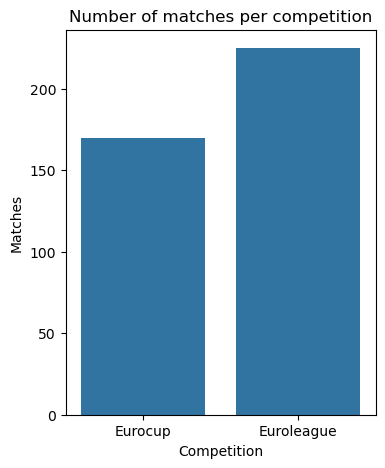

In [7]:
plt.figure(figsize=(4,5))
sns.countplot(data=competition, x='Competition')
plt.ylabel('Matches')
plt.title('Number of matches per competition')
plt.show()

In [8]:
# 2 What are the maximum points that a local team has scored per competition? And the road team as well.
max_points = competition[['Competition', 'Localscore', 'Roadscore']].groupby('Competition').max()
max_points.astype(int)

,Localscore,Roadscore
Competition,,
Eurocup,120,114
Euroleague,130,126


In [9]:
Euroleague = competition[competition['Competition']=='Euroleague']
Eurocup = competition[competition['Competition']=='Eurocup']

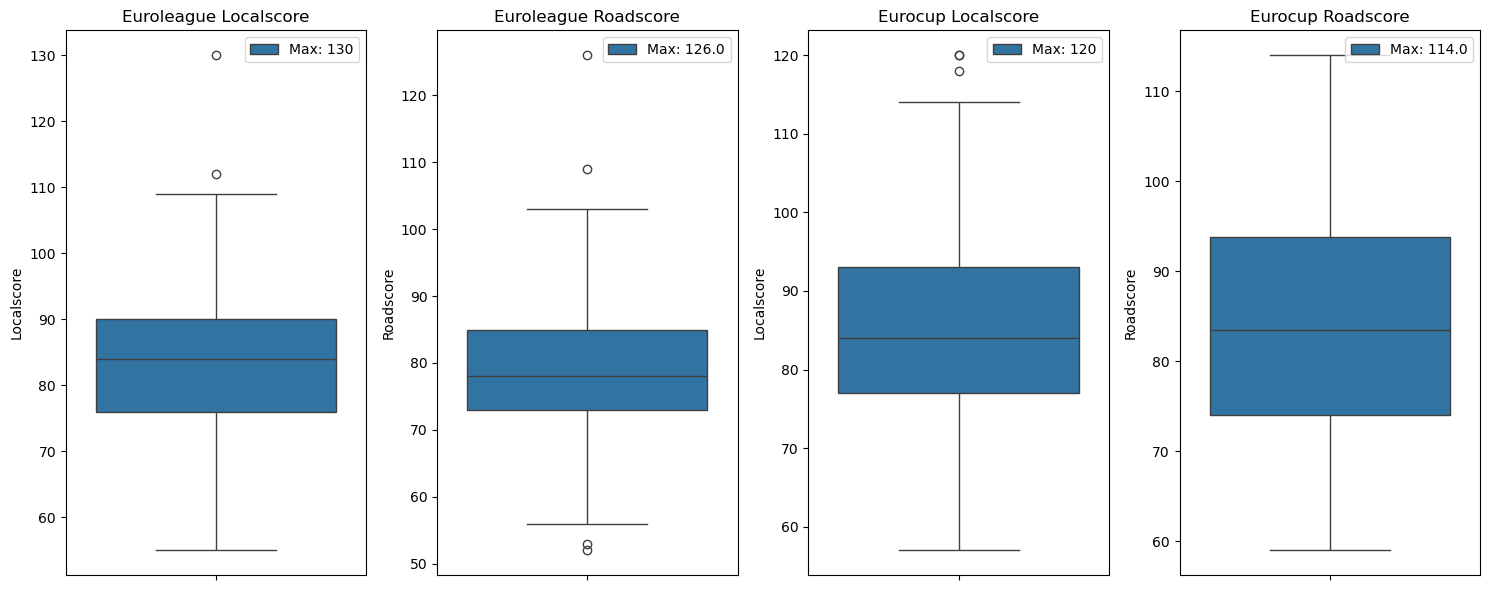

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15,6))

sns.boxplot(y="Localscore", data=Euroleague, ax=axs[0])
axs[0].set_title('Euroleague Localscore')
axs[0].legend({f"Max: {Euroleague['Localscore'].max()}"}, loc='upper right')

sns.boxplot(y="Roadscore", data=Euroleague, ax=axs[1]);
axs[1].set_title('Euroleague Roadscore')
axs[1].legend({f"Max: {Euroleague['Roadscore'].max()}"}, loc='upper right')

sns.boxplot(y="Localscore", data=Eurocup, ax=axs[2]) 
axs[2].set_title('Eurocup Localscore')
axs[2].legend({f"Max: {Eurocup['Localscore'].max()}"}, loc='upper right')

sns.boxplot(y="Roadscore", data=Eurocup, ax=axs[3]);
axs[3].set_title('Eurocup Roadscore')
axs[3].legend({f"Max: {Eurocup['Roadscore'].max()}"}, loc='upper right')

plt.tight_layout()
plt.show()

In [11]:
# 3 Do the same operations with the average points (per competition)
avg_points = competition[['Competition', 'Localscore', 'Roadscore']].groupby('Competition').mean()
round(avg_points, 2)

,Localscore,Roadscore
Competition,,
Eurocup,85.24,83.96
Euroleague,83.28,79.17


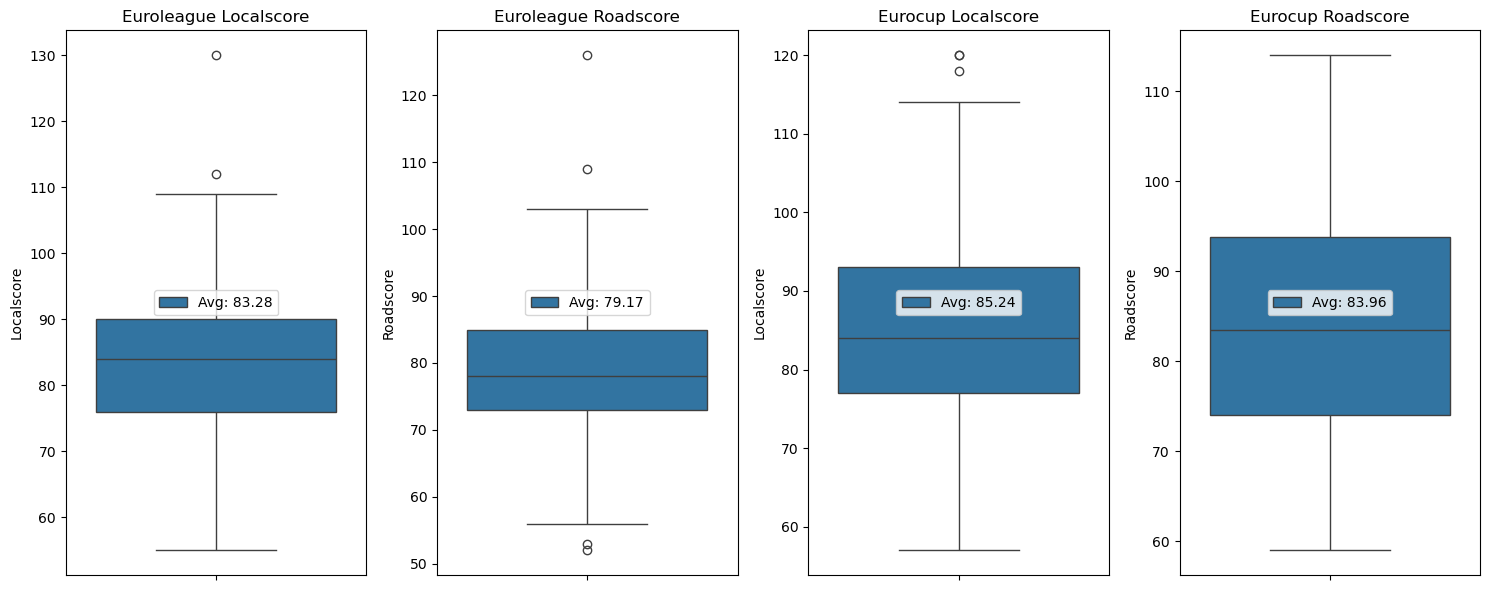

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15,6))

sns.boxplot(y="Localscore", data=Euroleague, ax=axs[0])
axs[0].set_title('Euroleague Localscore')
axs[0].legend({f"Avg: {round(Euroleague['Localscore'].mean(), 2)}"}, loc='center')

sns.boxplot(y="Roadscore", data=Euroleague, ax=axs[1]);
axs[1].set_title('Euroleague Roadscore')
axs[1].legend({f"Avg: {round(Euroleague['Roadscore'].mean(), 2)}"}, loc='center')

sns.boxplot(y="Localscore", data=Eurocup, ax=axs[2]) 
axs[2].set_title('Eurocup Localscore')
axs[2].legend({f"Avg: {round(Eurocup['Localscore'].mean(), 2)}"}, loc='center')

sns.boxplot(y="Roadscore", data=Eurocup, ax=axs[3]);
axs[3].set_title('Eurocup Roadscore')
axs[3].legend({f"Avg: {round(Eurocup['Roadscore'].mean(), 2)}"}, loc='center')

plt.tight_layout()
plt.show()

In [13]:
# 4. Can you tell me the maximum difference that has been in a match, splitted by competition? 
    # Careful: The Plusminus is both positive and negative, being negative that the Road Team has achieved the Victory.
    # To have the absolute, create a new Column named Absolut_Plusminus. Remember: np.where is life!

competition['Absolut_Plusminus'] = np.where(competition.Plusminus < 0, competition.Plusminus*-1, competition.Plusminus)
maxdif = competition[['Competition','Absolut_Plusminus']].groupby('Competition').max()
maxdif.astype(int)

,Absolut_Plusminus
Competition,
Eurocup,39
Euroleague,39


In [14]:
maxdifference = competition.loc[competition['Absolut_Plusminus']==39, :]
maxdifference

,Competition,Localscore,Roadscore,Plusminus,Ganador,Absolut_Plusminus
139,Eurocup,72,111.0,-39.0,Visitante,39.0
205,Euroleague,98,59.0,39.0,Local,39.0


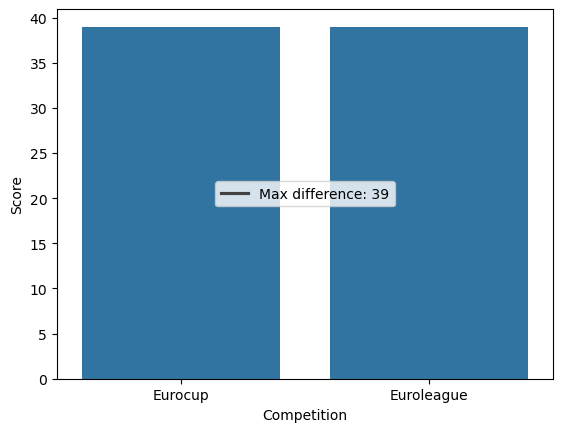

In [15]:
sns.barplot(data=maxdifference, x="Competition", y='Absolut_Plusminus');
plt.ylabel('Score')
plt.legend({f"Max difference: {int(maxdifference['Absolut_Plusminus'].mean())}"}, loc='center')
plt.show()

In [17]:
# 5 Also grouped by competition, give me the number of victories of the Locals and the Visitors

In [18]:
competition.sample()

,Competition,Localscore,Roadscore,Plusminus,Ganador,Absolut_Plusminus
292,Euroleague,81,89.0,-8.0,Visitante,8.0


<Axes: xlabel='Competition', ylabel='count'>

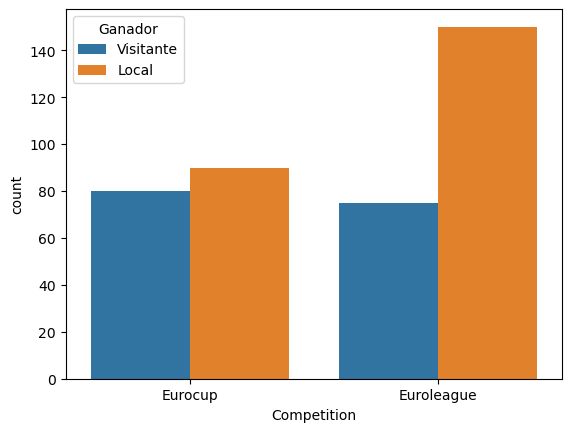

In [19]:
sns.countplot(data=competition, x='Competition', hue='Ganador')

# More Graphs!

Create one of each of the following graph types, with variables of your choice, and add at least two comments describing something interesting of each graph:

1. Comparison Charts (Barplot, Scatterplot or Countplot)
2. Histogram
3. Stack columns Chart
4. Correlation Matrix/Heatmap
5. Trends (Line Charts)

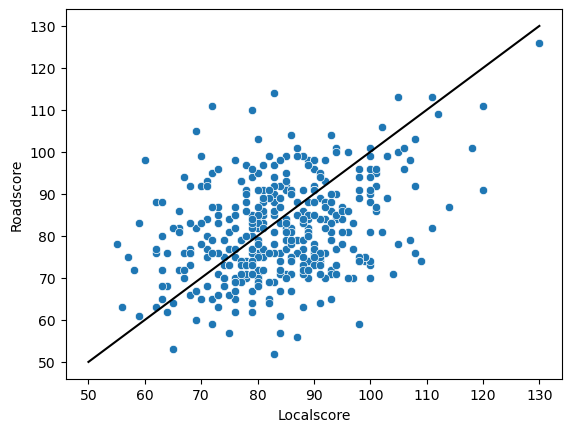

In [20]:
# Comparison Chart
# I want to visually display the score differences in a scatter plot
# I want to add a diagonal line (x=y) that represents the tied matches (even though in basketball there cannot be a tied match)
sns.scatterplot(x="Localscore", y="Roadscore", data=competition)
plt.plot([50, 130], [50, 130], color='black')
plt.show()

**Your comments here**
- We can crearly visually see left and above of the diagonal line, the matches won by the road team, and right and below the diagonal line, the matches won by the local team.
- We can also see the matches with low scores at the bottom left of the graph, and matches with high scores at the top right.

<Axes: xlabel='Absolut_Plusminus', ylabel='Count'>

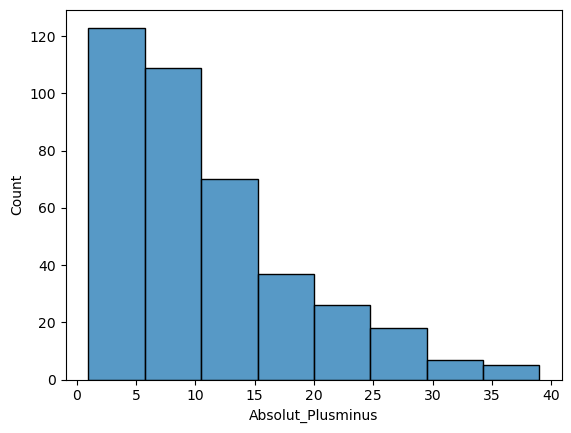

In [21]:
# Histogram
sns.histplot(data=competition, x='Absolut_Plusminus', bins=8)

<Axes: xlabel='Absolut_Plusminus', ylabel='Count'>

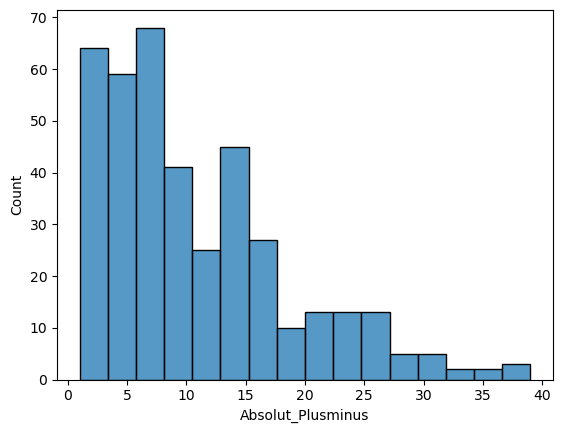

In [22]:
sns.histplot(data=competition, x='Absolut_Plusminus', bins=16)

**Your comments here**
- It shows us that most of the matches were close, with less than 10 points of difference   
- If we increase the number of bins, it shows us some peaks in score differences around 15.

<Axes: xlabel='Absolut_Plusminus', ylabel='Count'>

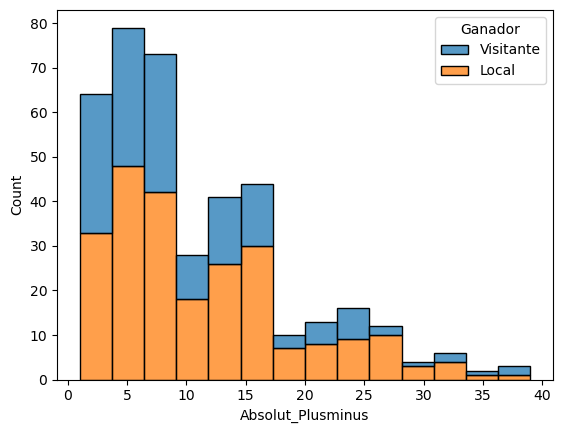

In [23]:
# Stacked columns
sns.histplot(data=competition, x='Absolut_Plusminus', hue='Ganador', multiple='stack')

<Axes: xlabel='Absolut_Plusminus', ylabel='Count'>

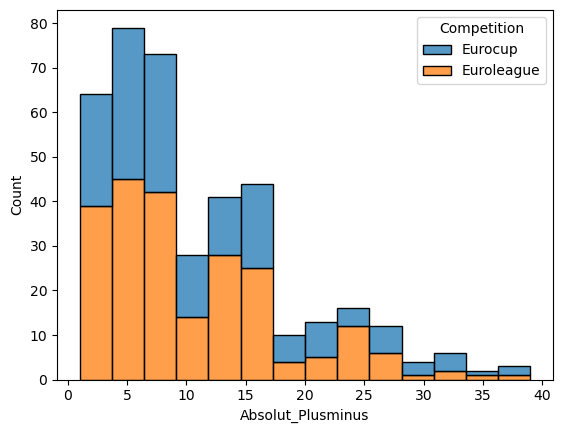

In [24]:
sns.histplot(data=competition, x='Absolut_Plusminus', hue='Competition', multiple='stack')

**Your comments here**
- Similar to the previous graph, but with information about a categorical value, either the winning team of the competition.
- In general, the local team has a higher ratio of wins.
- In the Euroleague, the matches are a bit more tight than in the Eurocup, where the scores then to be a bit more different.

In [25]:
competition.sample() # we take a look at the different variables

,Competition,Localscore,Roadscore,Plusminus,Ganador,Absolut_Plusminus
26,Eurocup,86,104.0,-18.0,Visitante,18.0


<Axes: >

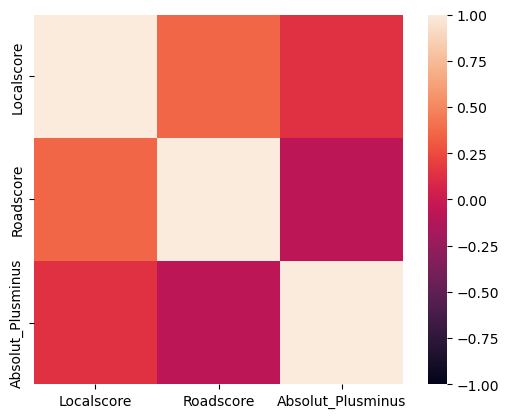

In [26]:
# Correlation / Heatmap
corr = competition[['Localscore', 'Roadscore', 'Absolut_Plusminus']].corr() # we mask only the numerical variables
sns.heatmap(corr,
            vmax=1, #defining max range
            vmin=-1, #defining min range
            square=True
            )

<Axes: >

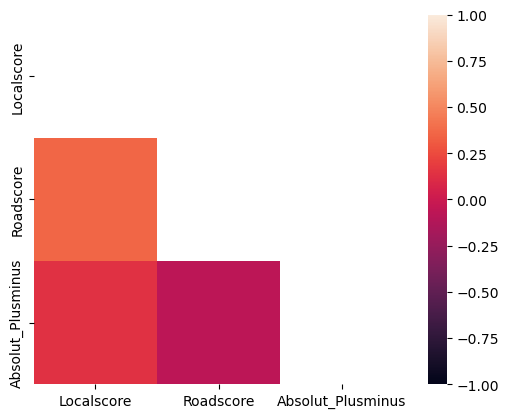

In [27]:
# Correlation / Heatmap
corr = competition[['Localscore', 'Roadscore', 'Absolut_Plusminus']].corr() # we mask only the numerical variables
mask = np.triu(np.ones_like(corr, dtype=bool)) # we can mask half the square, since it's simmetrical, it shows the same values twice
sns.heatmap(corr,
            mask=mask,
            vmax=1, #defining max range
            vmin=-1, #defining min range
            square=True
            )

In [28]:
corr

,Localscore,Roadscore,Absolut_Plusminus
Localscore,1.000000,0.356716,0.134643
Roadscore,0.356716,1.000000,-0.074829
Absolut_Plusminus,0.134643,-0.074829,1.000000


**Your comments here**
- A high correlation between the scores and the difference (Absolut_Plusminus) would mean that, the more points the teams score, the higher is the difference
- We know this is not true, as shown in the low values of these correlations (-0.07 and 0.13)
- This also means there's a higher correlation between the scores of each team (compared with the score differences).
- If all the matches had been super tight, this correlation would be higher than 0.35

<Axes: xlabel='Ganador', ylabel='value'>

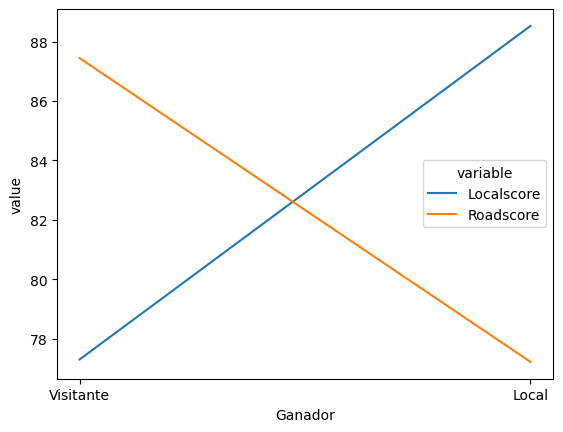

In [33]:
# Trends
df_melted = pd.melt(competition[['Localscore', 'Roadscore', 'Ganador']], ['Ganador'])
sns.lineplot(x="Ganador", y="value", hue='variable', data=df_melted, errorbar=None)

**Your comments here**
- In this simple graph we can see that when the roadteam won (Visitante), the localscore was lower, and the other way around, when the local team won, the localscore was higher.

<Axes: xlabel='Ganador', ylabel='Absolut_Plusminus'>

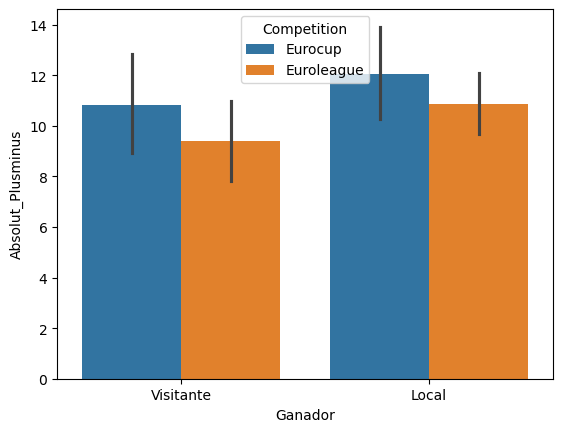

In [36]:
sns.barplot(data=competition, x='Ganador', y='Absolut_Plusminus', hue='Competition')

**Your comments here**
- As we saw before, here we can observe that the matches are a bit more tight in the Euroleague